This notebook contains code for running basic time series analysis on the energy generated data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime   # package that helps manipulate dates

#for decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# increase figure size
plt.rcParams['figure.figsize'] = [14, 10]

In [5]:
# import data (file and path are not from github, just downloaded because git stuff wasn't completed yet)
df = pd.read_csv("./nrg_gen_full_daily.csv")

#renaming the columns we want to actually keep 
df.rename(columns={
        'Data Dica': 'date', 
        'Selecione Tipo de GE Simp 4': 'energy_generated'
    }, inplace=True)

#Creating list of all columns we want to delete (gotten in separate cell using df.columns)
badcols = ['Data Escala de Tempo 1 GE Simp 4',
       'cod_aneel (tb_referenciacegusina (Usina))',
       'cod_nucleoaneel (tb_referenciacegusina (Usina))',
       'dsc_estado', 'id_subsistema', 'nom_tipousinasite', 'nom_usina2',
       'Período Exibido GE']
#actually deleting those unnecessary columns
for col in badcols:
    del df[col]
    
# turn "date" into a quantifiable object
df["date"] = pd.to_datetime(df["date"],format = '%d/%m/%Y')  


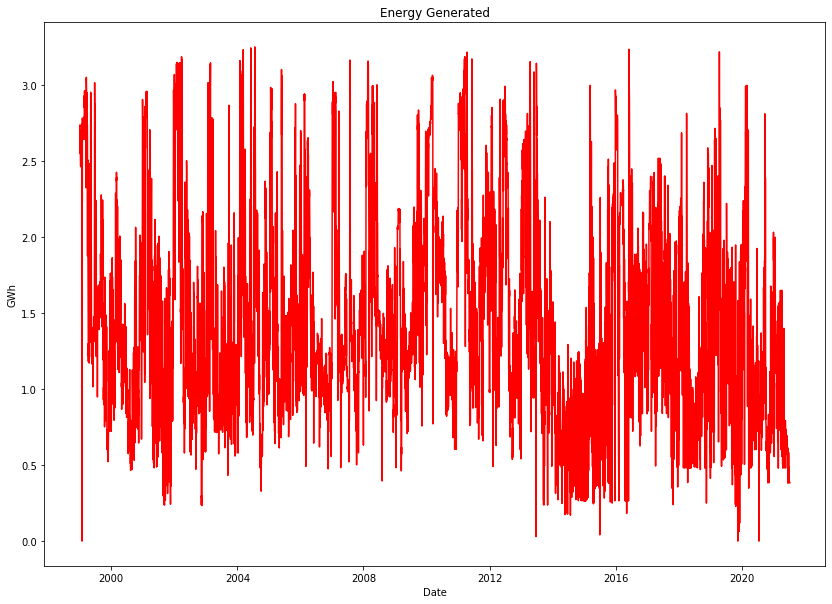

In [6]:
#plotting energy generated over full time period
plt.plot(df.date[:], df.energy_generated[:], 'r')   
plt.title('Energy Generated')
# Units not in GWh
plt.ylabel('GWh');
plt.xlabel('Date');
plt.show();

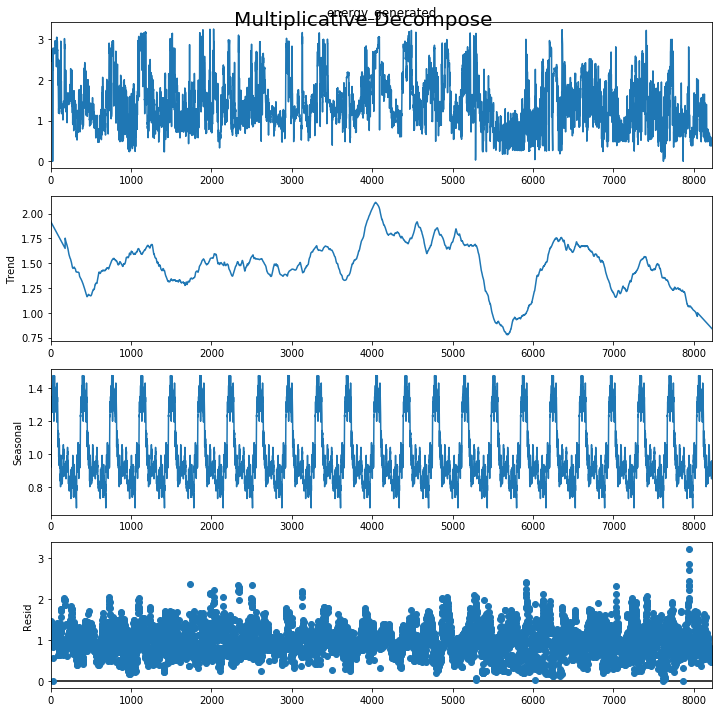

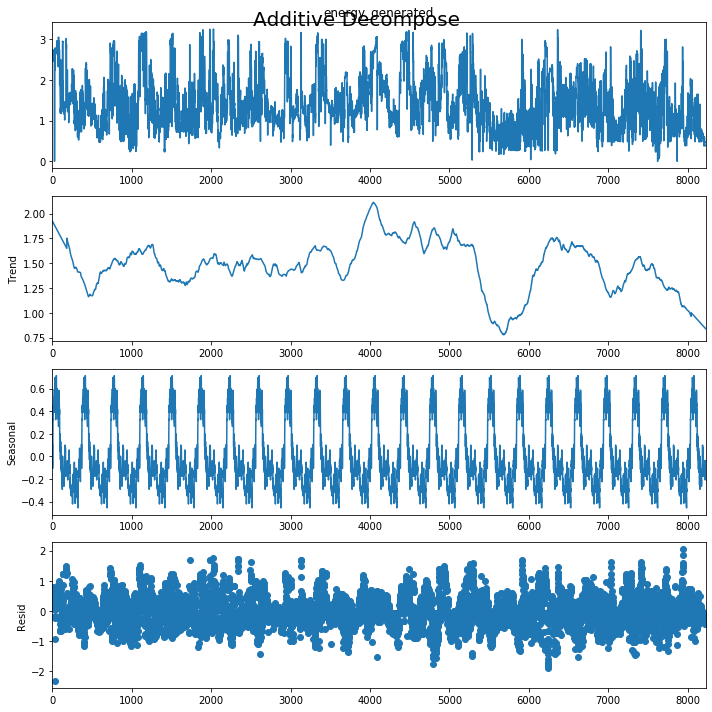

In [8]:
# here we are doing the basic time series decomposition that was demonstrated in class

# Must choose a period for the decomposition; here choosing an annual one
# Multiplicative Decomposition:  Returns seasonal, trend, and resid attributes
result_mul = seasonal_decompose(df['energy_generated'] + 0.0001, model='multiplicative', extrapolate_trend='freq', period=365)

# Additive Decomposition
result_add = seasonal_decompose(df['energy_generated'], model='additive', extrapolate_trend='freq', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)
plt.show()